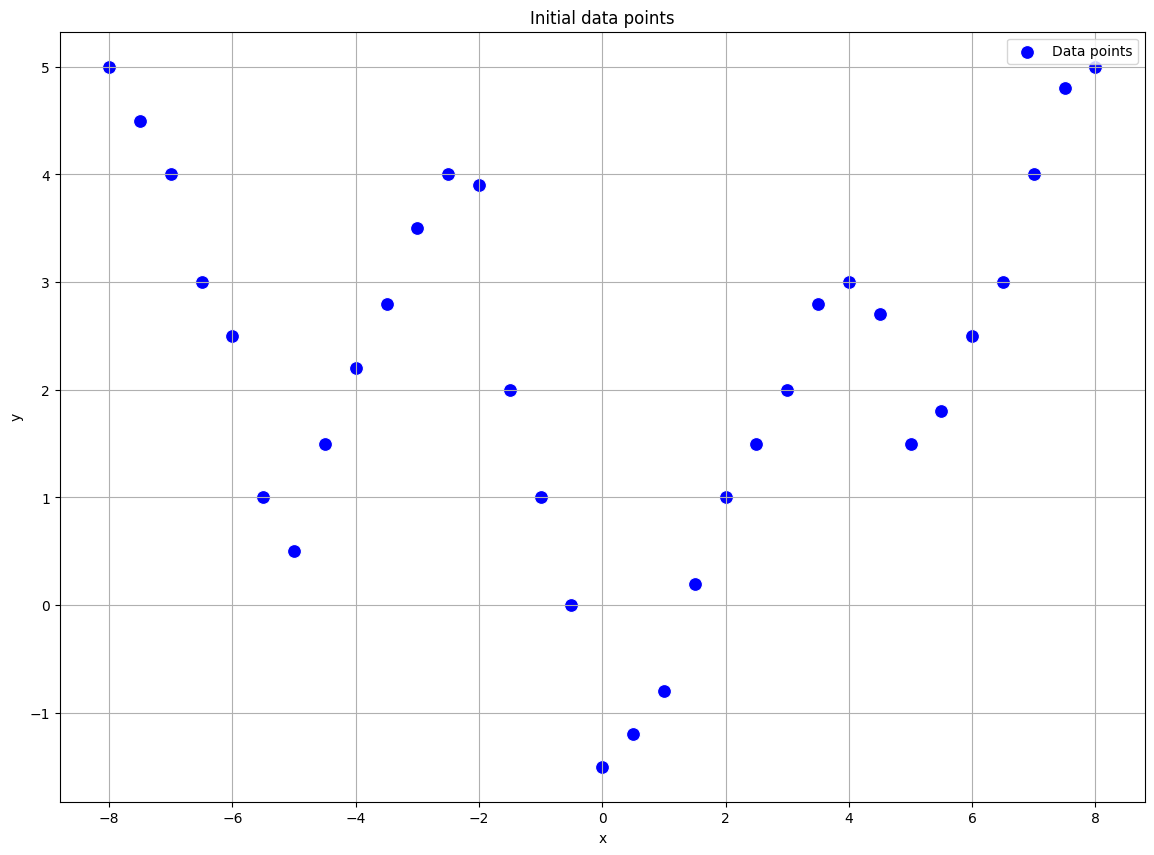

In [32]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

x = np.array([-8.0, -7.5, -7.0, -6.5, -6.0, -5.5, -5.0, -4.5, -4.0, -3.5, -3.0, -2.5, -2.0, -1.5, -1.0, -0.5,
              0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0])
y = np.array([5.0, 4.5, 4.0, 3.0, 2.5, 1.0, 0.5, 1.5, 2.2, 2.8, 3.5, 4.0, 3.9, 2.0, 1.0, 0.0,
              -1.5, -1.2, -0.8, 0.2, 1.0, 1.5, 2.0, 2.8, 3.0, 2.7, 1.5, 1.8, 2.5, 3.0, 4.0, 4.8, 5.0])
fig, ax  = plt.subplots(figsize=(14, 10))

sns.scatterplot(x=x, y=y, color='blue', s=100, label='Data points', ax=ax)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title("Initial data points")
ax.legend()
ax.grid(True)
ax.set_aspect('auto')

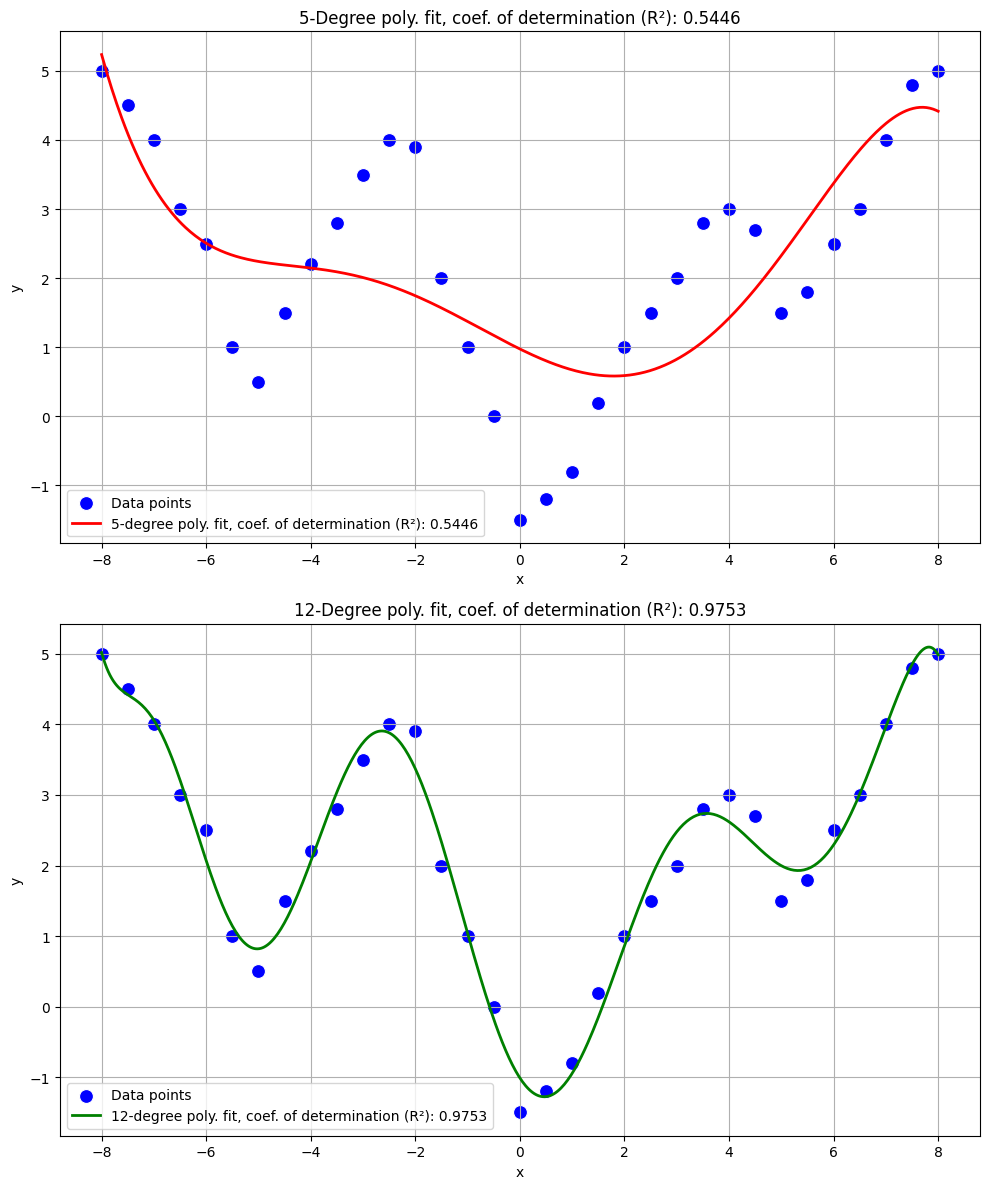

In [33]:
degree_1 = 5
coeffs_1 = np.polyfit(x, y, degree_1)
poly_1 = np.poly1d(coeffs_1)

degree_2 = 12
coeffs_2 = np.polyfit(x, y, degree_2)
poly_2 = np.poly1d(coeffs_2)

y_1_pred = poly_1(x)
ss_res = np.sum((y - y_1_pred) ** 2) 
ss_tot = np.sum((y - np.mean(y)) ** 2)  
r_squared_1 = 1 - (ss_res / ss_tot)

y_2_pred = poly_2(x)
ss_res = np.sum((y - y_2_pred) ** 2) 
ss_tot = np.sum((y - np.mean(y)) ** 2)  
r_squared_2 = 1 - (ss_res / ss_tot)

x_smooth = np.linspace(min(x), max(x), 500)
y_1_smooth = poly_1(x_smooth)
y_2_smooth = poly_2(x_smooth)

fig, axes = plt.subplots(2, 1, figsize=(10, 12))

sns.scatterplot(x=x, y=y, color='blue', s=100, label='Data points', ax=axes[0])
sns.lineplot(x=x_smooth, y=y_1_smooth, color='red',
             label=f'{degree_1}-degree poly. fit, coef. of determination (R²): {r_squared_1:.4f}', linewidth=2, ax=axes[0])
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title(f'{degree_1}-Degree poly. fit, coef. of determination (R²): {r_squared_1:.4f}')
axes[0].legend()
axes[0].grid(True)
axes[0].set_aspect('auto')

# Second plot
sns.scatterplot(x=x, y=y, color='blue', s=100, label='Data points', ax=axes[1])
sns.lineplot(x=x_smooth, y=y_2_smooth, color='green',
             label=f'{degree_2}-degree poly. fit, coef. of determination (R²): {r_squared_2:.4f}', linewidth=2, ax=axes[1])
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_title(f'{degree_2}-Degree poly. fit, coef. of determination (R²): {r_squared_2:.4f}')
axes[1].legend()
axes[1].grid(True)
axes[1].set_aspect('auto')

plt.tight_layout()
plt.show()


/tmp/ipykernel_5037/1362246421.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
/tmp/ipykernel_5037/1362246421.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


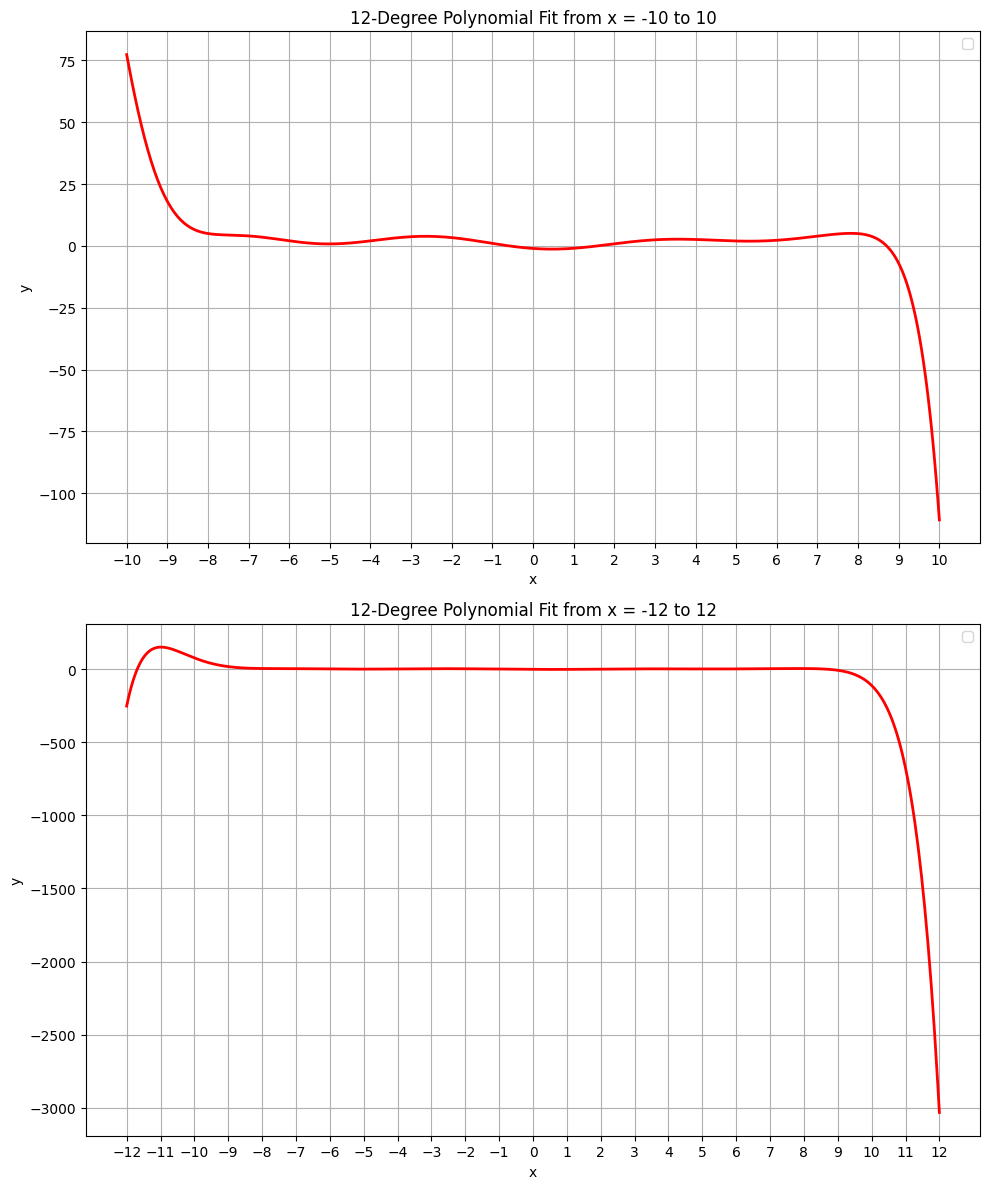

The expanded polynomial equation (degree 12) is:
            12            11             10             9             8
-2.628e-09 x  - 3.07e-09 x  + 7.519e-07 x  - 1.701e-07 x - 8.341e-05 x
              7            6            5          4          3
 + 8.348e-05 x + 0.004442 x - 0.005895 x - 0.1124 x + 0.1492 x
          2
 + 1.166 x - 1.135 x - 1.011


In [4]:
x_extended_10 = np.linspace(-10, 10, 500)
y_extended_10 = poly_2(x_extended_10)

x_extended_12 = np.linspace(-12, 12, 500)
y_extended_12 = poly_2(x_extended_12)

fig, axes = plt.subplots(2, 1, figsize=(10, 12))


sns.lineplot(x=x_extended_10, y=y_extended_10, color='red', linewidth=2, ax=axes[0])
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title(f'{degree_2}-Degree Polynomial Fit from x = -10 to 10')
axes[0].legend()
axes[0].grid(True)
axes[0].set_aspect('auto')
axes[0].set_xticks(np.arange(-10, 11, 1))

sns.lineplot(x=x_extended_12, y=y_extended_12, color='red', linewidth=2, ax=axes[1])
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_title(f'{degree_2}-Degree Polynomial Fit from x = -12 to 12')
axes[1].legend()
axes[1].grid(True)
axes[1].set_aspect('auto')
axes[1].set_xticks(np.arange(-12, 13, 1))

plt.tight_layout()
plt.show()

expanded_poly_2 = np.poly1d(coeffs_2)
print(f"The expanded polynomial equation (degree {degree_2}) is:")
print(expanded_poly_2)

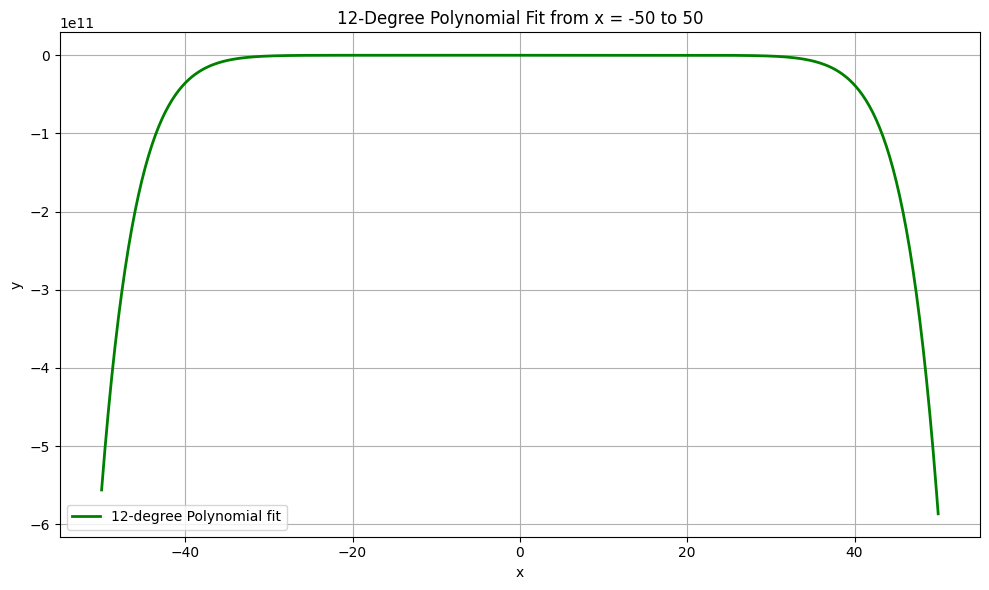

The expanded polynomial equation (degree 12) is:
            12            11             10             9             8
-2.628e-09 x  - 3.07e-09 x  + 7.519e-07 x  - 1.701e-07 x - 8.341e-05 x
              7            6            5          4          3
 + 8.348e-05 x + 0.004442 x - 0.005895 x - 0.1124 x + 0.1492 x
          2
 + 1.166 x - 1.135 x - 1.011


In [5]:
x_extended = np.linspace(-50, 50, 500)
y_extended = poly_2(x_extended)

plt.figure(figsize=(10, 6))
sns.lineplot(x=x_extended, y=y_extended, color='green', label=f'{degree_2}-degree Polynomial fit', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'{degree_2}-Degree Polynomial Fit from x = -50 to 50')
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()

expanded_poly_2 = np.poly1d(coeffs_2)
print(f"The expanded polynomial equation (degree {degree_2}) is:")
print(expanded_poly_2)

In [22]:
def dichotomy_minimize(f, a, b, tol=1e-3, max_iter=100000):
    delta = tol / 2
    iter_count = 0
    while abs(b - a) > tol and iter_count < max_iter:
        mid = (a + b) / 2
        left = mid - delta
        right = mid + delta
        
        if f(left) < f(right):
            b = right
        else:
            a = left

        iter_count += 1
    
    if iter_count >= max_iter:
        print("Warning: Maximum iterations reached without convergence")
    
    return (a + b) / 2

f_12 = np.poly1d(coeffs_2)
min_dichotomy = dichotomy_minimize(f_12, -8, 8)
print(min_dichotomy)


5.3215296011048565


In [23]:
def golden_ratio_minimize(f, a, b, tol=1e-5):
    golden_ratio = (1 + np.sqrt(5)) / 2
    
    c = b - (b - a) / golden_ratio
    d = a + (b - a) / golden_ratio
    
    while abs(b - a) > tol:
        if f(c) < f(d):
            b = d
        else:
            a = c
        
        c = b - (b - a) / golden_ratio
        d = a + (b - a) / golden_ratio
    
    return (a + b) / 2 

min_golden_ratio = golden_ratio_minimize(f_12, -8, 8)
print(f"x_min using golden ratio method: {min_golden_ratio:.4f}")

x_min using golden ratio method: 0.4651


In [24]:
def newton_minimize(f, df, d2f, x0, tol=1e-5, max_iter=100):
    x = x0
    for _ in range(max_iter):
        f_prime = df(x)
        f_double_prime = d2f(x)
        
        if abs(f_prime) < tol:
            break
        
        x = x - f_prime / f_double_prime
    
    return x


f_prime_12 = f_12.deriv()  
f_double_prime_12 = f_prime_12.deriv()

min_newton = newton_minimize(f_12, f_prime_12, f_double_prime_12, x0=0)
print(f"x_min using newton's method: {min_newton:.4f}")

x_min using newton's method: 0.4651


BIC for polynomial with degree 1 : 42.597776124875445
BIC for polynomial with degree 2 : 24.19876821829058
BIC for polynomial with degree 3 : 27.009105060011176
BIC for polynomial with degree 4 : 30.3980177739491
BIC for polynomial with degree 5 : 30.626922637052125
BIC for polynomial with degree 6 : 27.189413943430264
BIC for polynomial with degree 7 : 24.84250273893877
BIC for polynomial with degree 8 : -9.314143969914728
BIC for polynomial with degree 9 : -14.6600552887542
BIC for polynomial with degree 10 : -46.42357020658049
BIC for polynomial with degree 11 : -43.06112309330057
BIC for polynomial with degree 12 : -41.05333604827845
BIC for polynomial with degree 13 : -40.05328376818584
BIC for polynomial with degree 14 : -36.73710170279496


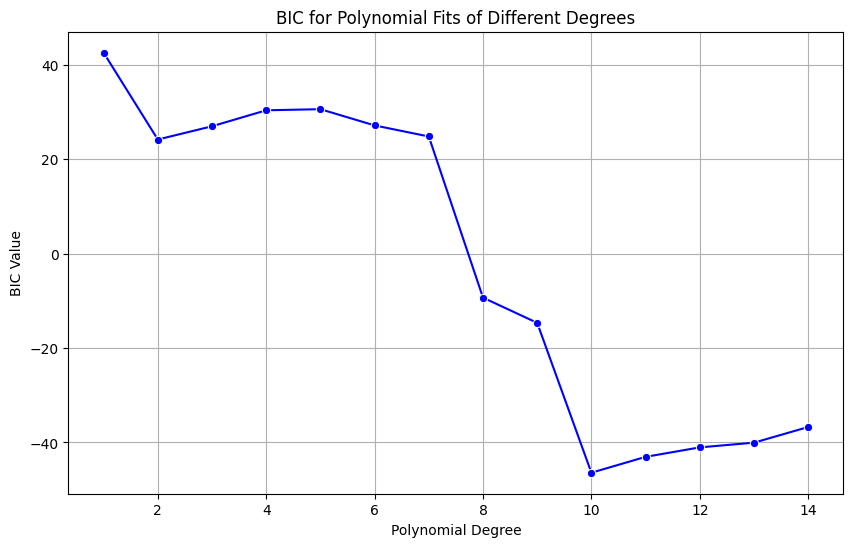

In [35]:
def compute_bic_for_poly(x, y, degree):
    coeffs = np.polyfit(x, y, degree)
    poly = np.poly1d(coeffs)
    y_pred = poly(x)
    
    n = len(y)
    
    rss = np.sum((y - y_pred) ** 2)
    
    k = degree + 1
    
    bic = n * np.log(rss / n) + k * np.log(n)
    
    return bic

bic_values = []
degrees = range(1, 15) 

for degree in degrees:
    bic = compute_bic_for_poly(x, y, degree)
    bic_values.append(bic)
    print(f"BIC for polynomial with degree {degree} : {bic}")

plt.figure(figsize=(10, 6))
sns.lineplot(x=degrees, y=bic_values, marker="o", color="blue")
plt.xlabel('Polynomial Degree')
plt.ylabel('BIC Value')
plt.title('BIC for Polynomial Fits of Different Degrees')
plt.grid(True)
plt.show()